In [647]:
# import required libraries
from pandas import DataFrame, read_csv
import pandas as pd 

### Read the data into dataframes for further manipulation

In [648]:
shakespearePlaysData = pd.read_csv('/Users/sdamaraju/PycharmProjects/IntroToDS-731/Shakespeare - Project2/data/raw/Shakespeare_data.csv')
shakespearePlaysData

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


### Data preprocessing

#### drop NANs to make the data concrete and predictible.

In [649]:
shakespearePlaysData = shakespearePlaysData.dropna(how='any')
shakespearePlaysData[0:200]

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...,...
201,202,Henry IV,29.0,1.2.88,FALSTAFF,"thee, Hal, I knew nothing, and now am I, if a man"
202,203,Henry IV,29.0,1.2.89,FALSTAFF,"should speak truly, little better than one of the"
203,204,Henry IV,29.0,1.2.90,FALSTAFF,"wicked. I must give over this life, and I will..."
204,205,Henry IV,29.0,1.2.91,FALSTAFF,"it over: by the Lord, and I do not, I am a vil..."


### Some basic data exploration..

#### Identify unique list of players

In [650]:
players = shakespearePlaysData.Player.unique()
players

array(['KING HENRY IV', 'WESTMORELAND', 'FALSTAFF', 'PRINCE HENRY',
       'POINS', 'EARL OF WORCESTER', 'NORTHUMBERLAND', 'HOTSPUR',
       'SIR WALTER BLUNT', 'First Carrier', 'Ostler', 'Second Carrier',
       'GADSHILL', 'Chamberlain', 'BARDOLPH', 'PETO', 'First Traveller',
       'Thieves', 'Travellers', 'LADY PERCY', 'Servant', 'FRANCIS',
       'Vintner', 'Hostess', 'Sheriff', 'Carrier', 'MORTIMER',
       'GLENDOWER', 'EARL OF DOUGLAS', 'Messenger', 'VERNON', 'WORCESTER',
       'ARCHBISHOP OF YORK', 'SIR MICHAEL', 'LANCASTER', 'BEDFORD',
       'GLOUCESTER', 'EXETER', 'OF WINCHESTER', 'CHARLES', 'ALENCON',
       'REIGNIER', 'BASTARD OF ORLEANS', 'JOAN LA PUCELLE',
       'First Warder', 'Second Warder', 'WOODVILE', 'Mayor', 'Officer',
       'Boy', 'SALISBURY', 'TALBOT', 'GARGRAVE', 'GLANSDALE', 'Sergeant',
       'First Sentinel', 'BURGUNDY', 'Sentinels', 'Soldier', 'Captain',
       'OF AUVERGNE', 'Porter', 'PLANTAGENET', 'SUFFOLK', 'SOMERSET',
       'WARWICK', 'Lawyer', '

In [651]:
print("There are "+str(len(players))+ " unique players in all the plays in the provided dataset.")

There are 934 unique players in all the plays in the provided dataset.


#### Identify unique list of plays

In [652]:
plays = shakespearePlaysData.Play.unique()
plays

array(['Henry IV', 'Henry VI Part 1', 'Henry VI Part 2',
       'Henry VI Part 3', 'Alls well that ends well', 'As you like it',
       'Antony and Cleopatra', 'A Comedy of Errors', 'Coriolanus',
       'Cymbeline', 'Hamlet', 'Henry V', 'Henry VIII', 'King John',
       'Julius Caesar', 'King Lear', 'Loves Labours Lost', 'macbeth',
       'Measure for measure', 'Merchant of Venice',
       'Merry Wives of Windsor', 'A Midsummer nights dream',
       'Much Ado about nothing', 'Othello', 'Pericles', 'Richard II',
       'Richard III', 'Romeo and Juliet', 'Taming of the Shrew',
       'The Tempest', 'Timon of Athens', 'Titus Andronicus',
       'Troilus and Cressida', 'Twelfth Night', 'Two Gentlemen of Verona',
       'A Winters Tale'], dtype=object)

In [653]:
print("There are "+str(len(plays))+ " unique plays in the provided dataset.")

There are 36 unique plays in the provided dataset.


#### Identify play and number of players

In [654]:
playAndNumberOfPlayers = shakespearePlaysData.groupby(['Play'])['Player'].nunique()
playAndNumberOfPlayers

Play
A Comedy of Errors          20
A Midsummer nights dream    30
A Winters Tale              35
Alls well that ends well    25
Antony and Cleopatra        54
As you like it              27
Coriolanus                  61
Cymbeline                   40
Hamlet                      34
Henry IV                    35
Henry V                     47
Henry VI Part 1             52
Henry VI Part 2             65
Henry VI Part 3             46
Henry VIII                  47
Julius Caesar               50
King John                   29
King Lear                   26
Loves Labours Lost          20
Measure for measure         25
Merchant of Venice          23
Merry Wives of Windsor      24
Much Ado about nothing      24
Othello                     28
Pericles                    48
Richard II                  36
Richard III                 70
Romeo and Juliet            37
Taming of the Shrew         37
The Tempest                 20
Timon of Athens             55
Titus Andronicus            27
Tro

#### Plotting the observations..

Text(0.5, 1.0, 'Play vs Number of Players')

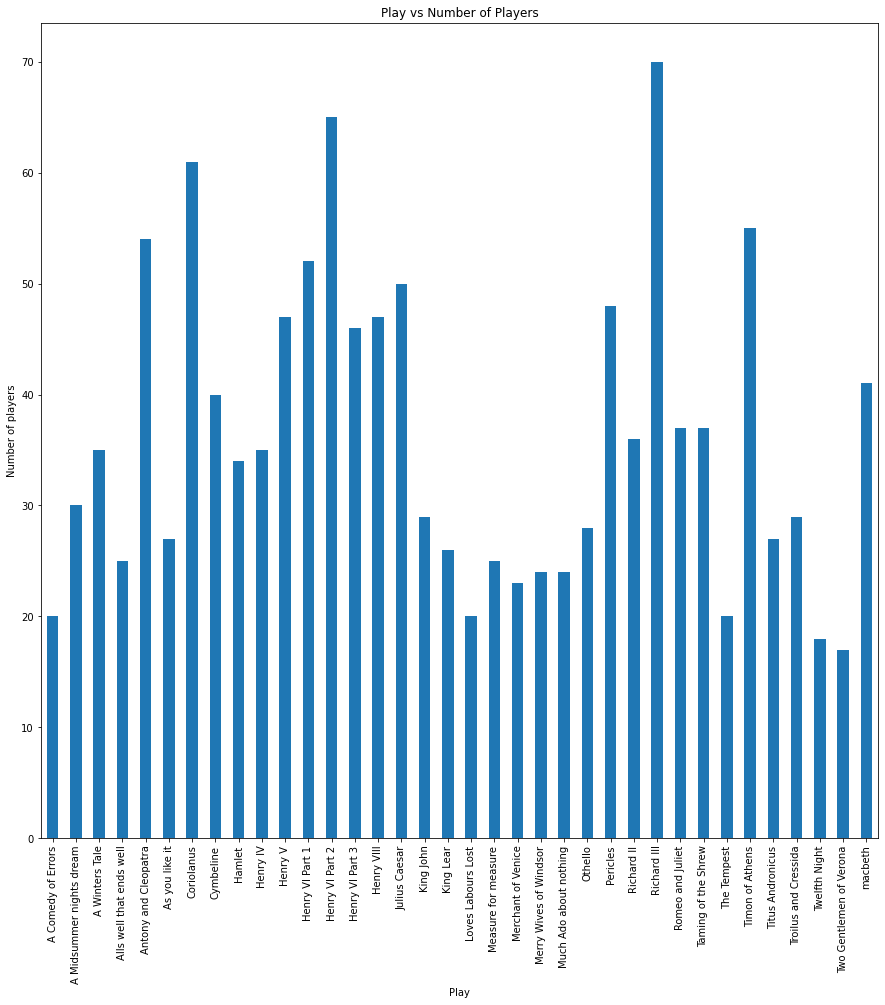

In [655]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
settings = playAndNumberOfPlayers.plot(kind='bar')
settings.set(xlabel='Play', ylabel='Number of players')
plt.title("Play vs Number of Players")


#### identify number of dialogues per player per play

In [656]:
playPlayerAndNumberOfDialogues = shakespearePlaysData.groupby(['Play','Player'])['PlayerLine'].nunique()
playPlayerAndNumberOfDialogues

Play                Player          
A Comedy of Errors  ADRIANA             265
                    AEGEON              144
                    AEMELIA              73
                    ANGELO               79
                    ANTIPHOLUS            6
                                       ... 
macbeth             Son                  20
                    Third Apparition      5
                    Third Murderer        8
                    Third Witch          27
                    YOUNG SIWARD          7
Name: PlayerLine, Length: 1302, dtype: int64

#### Plotting the observations..

In [657]:
plt.figure(figsize=(100,600))
settings=playPlayerAndNumberOfDialogues.plot(kind='barh')
plt.title("Play and Player vs Number of Dialogues")

Text(0.5, 1.0, 'Play and Player vs Number of Dialogues')

### Feature Engineering - 2

#### Would like to use the tag cloud or the word cloud for classification,
#### so would be filtering some unnecessary characters or common words and converting strings to a common case. 

In [658]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
commonWords = list(stopwords.words('english'))
shakespearePlaysData['processed_list_of_words_per_playerLine'] = shakespearePlaysData['PlayerLine'].str.lower()
#converting to lower case because stopwords are in lower case so trying to keep them in same case for reg-ex match
for eachWord in commonWords:
    shakespearePlaysData['processed_list_of_words_per_playerLine'] = shakespearePlaysData['processed_list_of_words_per_playerLine'].str.replace(" "+eachWord+" "," ")    
# " " appended for each word to take care of replacing full string match for  commonWords and avoid substring    

#Remove unneccsary grammar and punctiations.
#Source http://www.nltk.org/api/nltk.tokenize.html?highlight=punkt
punctuationAndOtherSplCharacters = (';', ':', ',', '.', '!', '?','\'s','\n')
for eachChar in PUNCTUATION:
    shakespearePlaysData['processed_list_of_words_per_playerLine'] = shakespearePlaysData['processed_list_of_words_per_playerLine'].str.replace(eachChar,' ')    


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sdamaraju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-658-f66cb4732bb7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shakespearePlaysData['processed_list_of_words_per_playerLine'] = shakespearePlaysData['PlayerLine'].str.lower()
<ipython-input-658-f66cb4732bb7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shakespearePlaysData['processed_list_of_words_per_playerLine'] = shakespearePlaysData['pro

In [659]:
processedData = shakespearePlaysData.groupby(['Player'])['processed_list_of_words_per_playerLine'].unique().apply(list)
processedData

## Stuck here, 
# My idea was to explore all the words for a player in all plays 
# and maintain a list of frequency of words used for every player and use
# that for training the ML model, 
# The Ml model then uses this data on validation content.
# But not sure how to train in this context, looking forward for further sessions to get enabled on this idea.

Player
A Lord                                                      [sir  i ]
A Patrician         [this man marr'd fortune , you nobler , ay  bu...
A Player            [so please lordship accept duty , i think 'twa...
AARON               [now climbeth tamora olympus' top , safe fortu...
ABERGAVENNY         [i cannot tell, what heaven hath given him --l...
                                          ...                        
Young MARCIUS       [a' shall tread me , i'll run away till bigger...
of BUCKINGHAM       [[to king richard iii], the last helped thee c...
of King Henry VI    [[to king richard iii], when mortal  anointed ...
of Prince Edward    [[to king richard iii], let sit heavy thy soul...
of young Princes    [[to king richard iii], dream thy cousins smot...
Name: processed_list_of_words_per_playerLine, Length: 934, dtype: object

### Feature Engineering - 2

#### Split the feature ActSceneLine in to 3 different integer columns to use them as three different features for classification

In [660]:

splitTemp = shakespearePlaysData['ActSceneLine'].str.split('.', expand=True)
shakespearePlaysData['Act'] = splitTemp[0]
shakespearePlaysData['Scene'] = splitTemp[1]
shakespearePlaysData['SceneLine'] = splitTemp[2]

<ipython-input-660-95bf269daaa2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shakespearePlaysData['Act'] = splitTemp[0]
<ipython-input-660-95bf269daaa2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shakespearePlaysData['Scene'] = splitTemp[1]
<ipython-input-660-95bf269daaa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [661]:
# To identify the class, (Player) we need to encode it to possibly an integer
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
shakespearePlaysData['Player']=encoder.fit_transform(shakespearePlaysData['Player'].astype('str'))

<ipython-input-661-25db3f0e69c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shakespearePlaysData['Player']=encoder.fit_transform(shakespearePlaysData['Player'].astype('str'))


In [662]:
# Little data processing, shuffle the dataframe and also remove unnecessary columns.
shakespearePlaysData = shakespearePlaysData.sample(frac = 1) 
processedShakespearePlays=shakespearePlaysData.drop(['Dataline','Play','PlayerLinenumber','ActSceneLine','PlayerLine','processed_list_of_words_per_playerLine'], axis = 1) 

### Splitting data into test and train sets

In [663]:
#Splitting the data into X and Y.. 
array = processedShakespearePlays.values
X = array[:,1:4]
Y = array[:,0]
Y=Y.astype(int)  #making sure, its integers.
from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20)

### Classifications

#### Gaussian Naive Baeysian

In [664]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print("Accuracy")
print(accuracy_score(Y_validation, predictions))
data = [["NaiveBaeysian",accuracy_score(Y_validation, predictions).round()]]

Accuracy
0.02705529932005135


#### KNeighborsClassifier

In [665]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print("Accuracy")
print(accuracy_score(Y_validation, predictions))
data.extend(["KNNeighbour",accuracy_score(Y_validation, predictions).round()])

Accuracy
0.03062146355380153


#### Decision tree classifier

In [666]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier().fit(X_train, Y_train)
print("Accuracy")
print(classifier.score(X_validation, Y_validation))
data.extend(["Decision Tree",classifier.score(X_validation, Y_validation).round()])

Accuracy
0.050306690124102514
